In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as exp

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mymoviedb.csv",lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [9]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])

In [10]:
print(df["Release_Date"].dtypes)

datetime64[ns]


In [11]:
df["Year"] = df["Release_Date"].dt.year

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [13]:
# Droping The Unwanted Columns

In [14]:
columns = ["Overview","Original_Language","Poster_Url"]

df = df.drop(columns,axis = 1)

In [15]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,7.6,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,3.5,Horror,2020
9824,2016-05-06,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History",2021


In [16]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Year'],
      dtype='object')

**categorizing Vote_Average column**

We would cut the Vote_Average values and make 4 categories popular , average, below_Average,not_popular to describe it more using categorize_col() function provided above

In [18]:
df["Vote_Average"].describe()

count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64

In [19]:
def categoriez(df,col,labels):
    edges = [df[col].describe()["min"],
             df[col].describe()["25%"],
             df[col].describe()["50%"],
             df[col].describe()["75%"],
             df[col].describe()["max"]
            ]
    df[col] = pd.cut(df[col],bins = edges,labels = labels,duplicates = "drop")
    return df

In [20]:
categoriez(df,"Vote_Average",labels = ["not_popular","below_average","average","popular"])

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below_average,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,popular,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,not_popular,Horror,2020
9824,2016-05-06,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History",2021


In [21]:
df["Vote_Average"].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [22]:
df.Vote_Average.value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [23]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Year            0
dtype: int64

In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below_average,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [25]:
df["Genre"] = df["Genre"].str.split(", ")

In [26]:
df["Genre"]

0       [Action, Adventure, Science Fiction]
1                 [Crime, Mystery, Thriller]
2                                 [Thriller]
3       [Animation, Comedy, Family, Fantasy]
4         [Action, Adventure, Thriller, War]
                        ...                 
9822                          [Drama, Crime]
9823                                [Horror]
9824             [Mystery, Thriller, Horror]
9825                 [Music, Drama, History]
9826           [War, Drama, Science Fiction]
Name: Genre, Length: 9727, dtype: object

In [27]:
df = df.explode("Genre").reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


In [28]:
int()

0

In [29]:
df["Genre"].dtype

dtype('O')

In [30]:
df["Genre"]=df["Genre"].astype("category")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25552 non-null  datetime64[ns]
 1   Title         25552 non-null  object        
 2   Popularity    25552 non-null  float64       
 3   Vote_Count    25552 non-null  int64         
 4   Vote_Average  25552 non-null  category      
 5   Genre         25552 non-null  category      
 6   Year          25552 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 949.2+ KB


*******Data Visualization*******

In [33]:
sns.set_style("whitegrid")

# what is the Most Frequent Genre of Movies Released on Netflix ?

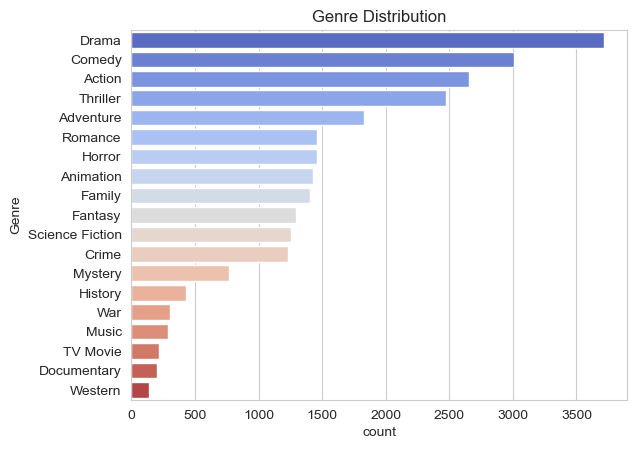

In [70]:
sns.countplot(df["Genre"],order = df["Genre"].value_counts().index,palette = "coolwarm")
plt.title("Genre Distribution")
plt.show()

# Which has highest votes in vote avg column?

In [74]:
data = df["Vote_Average"].value_counts()
data

Vote_Average
average          6613
popular          6520
below_average    6348
not_popular      6071
Name: count, dtype: int64

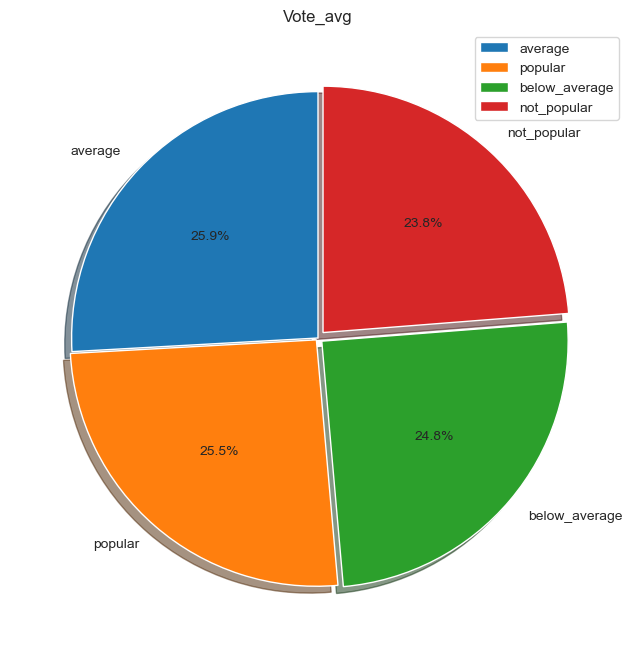

In [118]:
plt.figure(figsize = (10,8))
plt.pie(
    data.values,
    labels=data.index,         
    autopct="%1.1f%%",         
    startangle=90,
    explode = (0.0,0.01,0.02,0.03),
    shadow = True
)
plt.title("Vote_avg")
plt.legend()
plt.show()

# what movie got the Highest Popularity? what's its genre?

In [133]:
df[df["Popularity"]==df["Popularity"].max()][["Title","Genre"]]

,Title,Genre
0,Spider-Man: No Way Home,Action
1,Spider-Man: No Way Home,Adventure
2,Spider-Man: No Way Home,Science Fiction


# what Movie Got the Lowest Popularity ? What's its Genre?

In [144]:
df.query("Popularity == Popularity.min()")[["Title","Genre"]]

,Title,Genre
25546,The United States vs. Billie Holiday,Music
25547,The United States vs. Billie Holiday,Drama
25548,The United States vs. Billie Holiday,History
25549,Threads,War
25550,Threads,Drama
25551,Threads,Science Fiction


# which Year has the Most Filmed Movies?

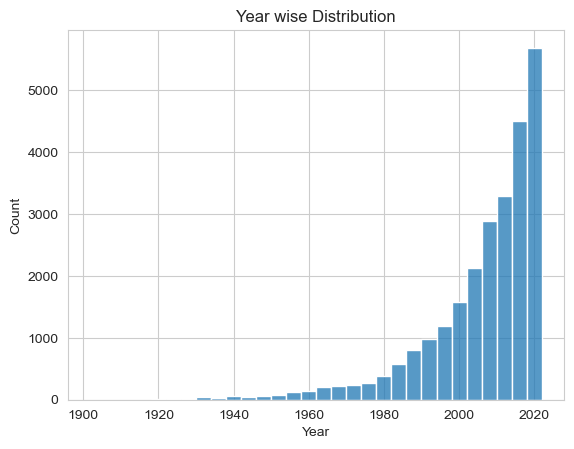

In [161]:
sns.histplot(df["Year"],bins = 30)
plt.title("Year wise Distribution")
plt.show()

# Conclusion
# Q1: What is the most frequent genre in the dataset?
 Drama genre is the most frequent genre in our dataset and has appeared more than
 14% of the times among 19 other genres.
# Q2: What genres has highest votes ?
 we have 25.5% of our dataset with popular vote (6520 rows). 
Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.
# Q3: What movie got the highest popularity ? what's its Action , genre ?
 Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
 genres of Adventure and Sience Fiction .
# Q4: What movie got the lowest popularity ? what's its genre ?
 The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama,'war', 'sci-fi' and history`.
# Q4: Which year has the most filmmed movies?
 year 2020 has the highest filmming rate in our dataset